![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [28]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [29]:
#lets check for NA values
print(penguins_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex                332 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.1+ KB
None


There seems to be no NAs we can proceed with some preprocessing

In [30]:
#use get dummies to make object vals into usable values, then scaling after
df = pd.get_dummies(penguins_df, columns = ['sex'], drop_first = True)


#then we use standard Scaler
scaler = StandardScaler()

df = scaler.fit_transform(df)

print(df)

[[-0.90390586  0.79035987 -1.42534179 -0.56694801  0.99399394]
 [-0.83043377  0.12618674 -1.0685765  -0.50484747 -1.00604235]
 [-0.68348959  0.43272819 -0.42639899 -1.18795343 -1.00604235]
 ...
 [ 1.17168063 -0.74234736  1.50013355  1.91707363  0.99399394]
 [ 0.21654349 -1.20215952  0.78660298  1.23396768 -1.00604235]
 [ 1.07984052 -0.53798639  0.85795603  1.48236985  0.99399394]]


In [31]:
#we then try to optimize cluster count by using elbow analysis

inertia = []

for i in range(1,10):
    kmeans = KMeans(n_clusters = i, random_state = 42).fit(df)
    #extract intertia
    inertia.append(kmeans.inertia_)
    

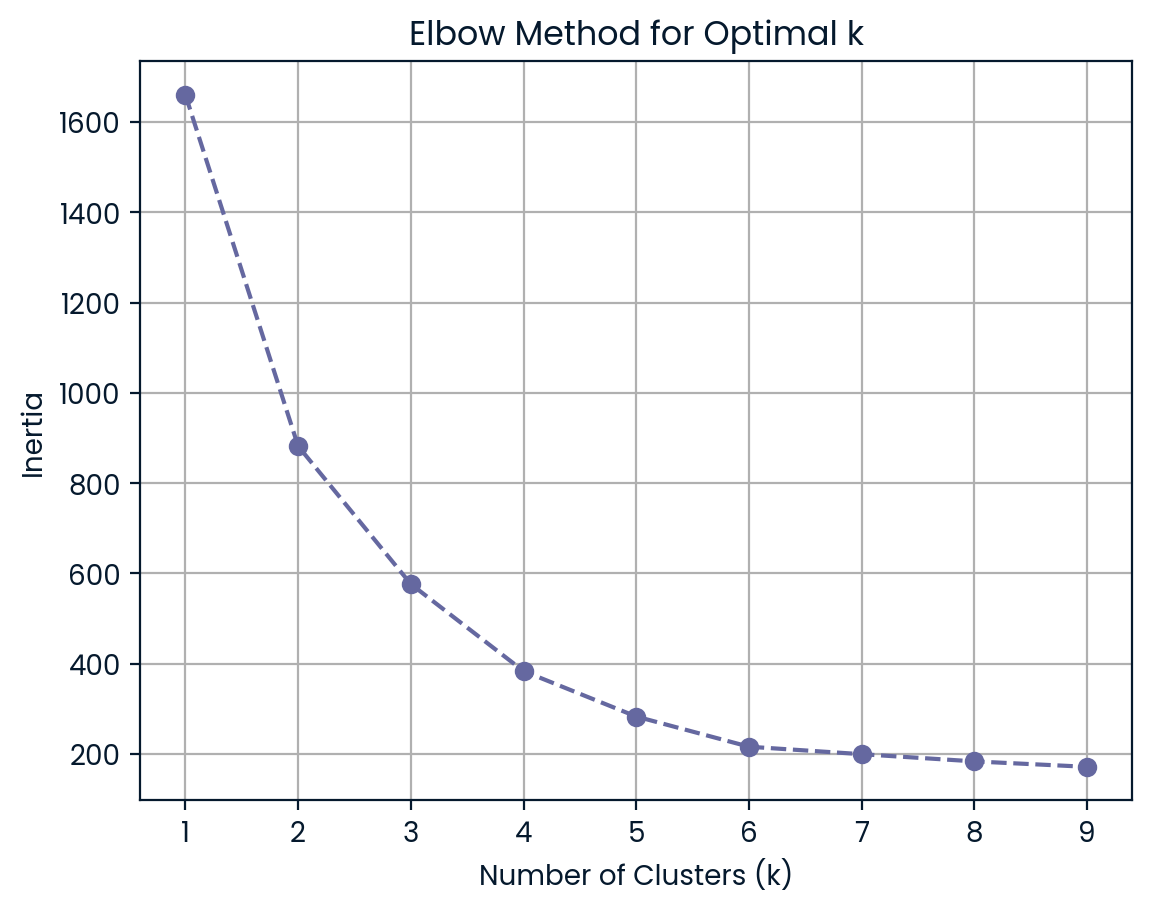

In [32]:
plt.plot(range(1, 10), inertia, marker='o', linestyle='--')

plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')


plt.grid(True)
plt.show()

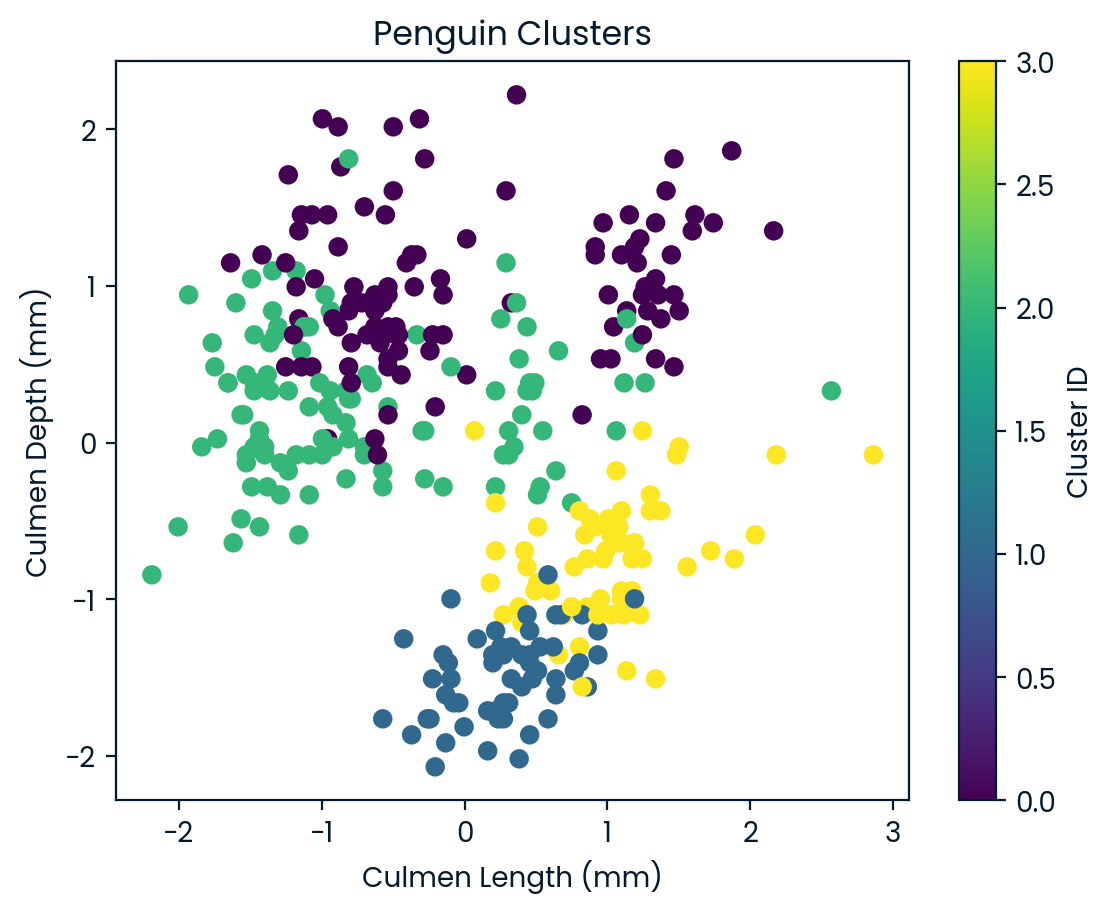

In [33]:
#now we know its 4 or 3


final_model = KMeans(n_clusters = 4, random_state = 42).fit(df)

scatter = plt.scatter(
            df[:, 0], 
            df[:, 1],
            c=final_model.labels_, 
            cmap='viridis'
)

plt.xlabel('Culmen Length (mm)')
plt.ylabel('Culmen Depth (mm)')
plt.title('Penguin Clusters')

plt.colorbar(label='Cluster ID')

plt.show()

In [34]:
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

penguins_df['label'] = final_model.labels_

stat_penguins = penguins_df.groupby('label')[numeric_columns].mean()

print(stat_penguins)

       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
label                                                                   
0             43.878302        19.111321         194.764151  4006.603774
1             45.563793        14.237931         212.706897  4679.741379
2             40.217757        17.611215         189.046729  3419.158879
3             49.473770        15.718033         221.540984  5484.836066
